In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets/Dataset.zip -d /content

In [5]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
import tqdm

!pip install torchmetrics
from torchmetrics.classification import BinaryAccuracy

metric = BinaryAccuracy().to('cuda')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torchmetrics-0.11.0-py3-none-any.whl (512 kB)


In [6]:
batch_size = 128

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.Grayscale(num_output_channels=1),])

data = torchvision.datasets.ImageFolder('/content/Dataset',transform=transform)

dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [7]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 32, 32)):
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

print(data[1000][0].shape)

torch.Size([1, 32, 32])


# DCGAN Generator

In [8]:
class Generator(nn.Module):
  def __init__(self,z_dim,chan,h_dim):
    super(Generator,self).__init__()
    self.z=z_dim
    self.chan=chan
    self.h=h_dim
    self.layers=nn.Sequential(
      nn.Sequential(
      nn.ConvTranspose2d(self.z, self.h * 4,kernel_size=3, stride=2),
      nn.BatchNorm2d(self.h * 4),
      nn.ReLU(inplace=True)),

      nn.Sequential(
      nn.ConvTranspose2d(self.h * 4,self.h * 2,kernel_size=3, stride=2),
      nn.BatchNorm2d(self.h * 2),
      nn.ReLU(inplace=True)),

      nn.Sequential(
      nn.ConvTranspose2d(self.h * 2,self.h,kernel_size=3, stride=2),
      nn.BatchNorm2d(self.h),
      nn.ReLU(inplace=True)),

      nn.Sequential(
      nn.ConvTranspose2d(self.h,self.chan,kernel_size=4, stride=2),
      nn.Tanh())
    )
  def forward(self,X):
    z_dim=X.shape[1]
    X=X.view(len(X), z_dim, 1, 1)
    return self.layers(X)
def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)


# DCGAN Discriminator

In [9]:
class Discriminator(nn.Module):
  def __init__(self,chan,h_dim):
    super(Discriminator,self).__init__()
    self.chan=chan
    self.h=h_dim
    self.layers=nn.Sequential(
      nn.Sequential(
        nn.Conv2d(self.chan, self.h, kernel_size=4, stride=2),
        nn.BatchNorm2d(self.h),
        nn.LeakyReLU(0.2,inplace=True)
        ),
    nn.Sequential(
        nn.Conv2d(self.h, self.h * 2, kernel_size=4, stride=2),
        nn.BatchNorm2d(self.h * 2),
        nn.LeakyReLU(0.2,inplace=True)
        ),
    nn.Sequential(
        nn.Conv2d(self.h * 2, 1, kernel_size=4, stride=3),
        ),
    )
  def forward(self,X):
    disc_pred = self.layers(X)
    return disc_pred.view(len(disc_pred), -1)

In [10]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 100
display_step = 100
batch_size = 128
lr = 0.0011
beta_1 = 0.5 
beta_2 = 0.999

device = 'cuda' if torch.cuda.is_available() else 'cpu'

gen = Generator(z_dim,1,64).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))

disc = Discriminator(1,16).to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

# Train DCGAN

Step 100:
Generator loss: 1.288422691524029
Discriminator loss: 0.5781916657090185


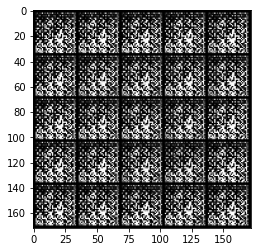

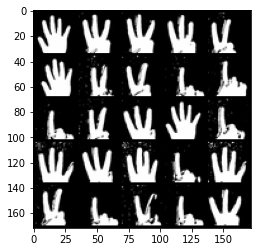

Step 200:
Generator loss: 2.1743467056751262
Discriminator loss: 0.31392986610531826


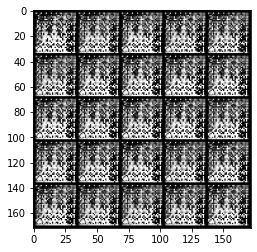

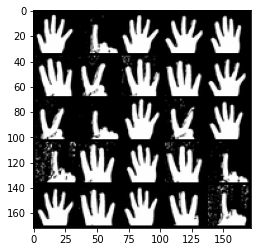

Step 300:
Generator loss: 2.3433743488788608
Discriminator loss: 0.40478048801422134


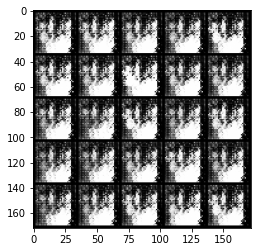

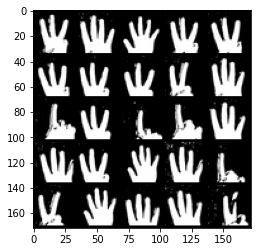

Step 400:
Generator loss: 2.464740846157074
Discriminator loss: 0.41305002748966224


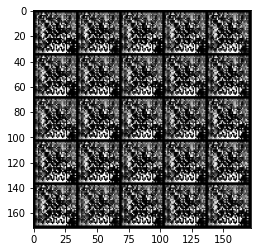

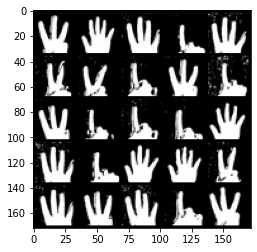

Step 500:
Generator loss: 2.96533919095993
Discriminator loss: 0.1341695185005664


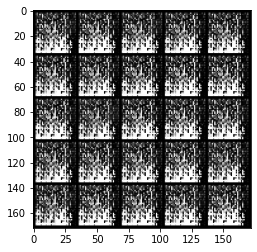

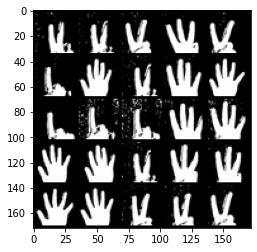

Step 600:
Generator loss: 2.4808450436592095
Discriminator loss: 0.42059279412031164


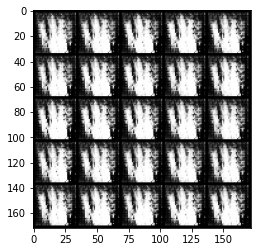

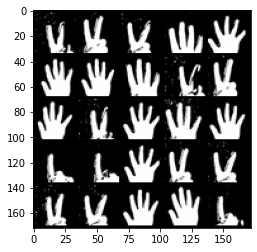

Step 700:
Generator loss: 2.0935015416145326
Discriminator loss: 0.4641324588656426


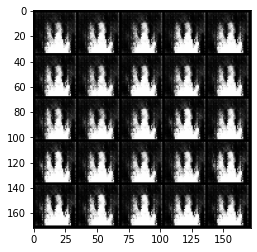

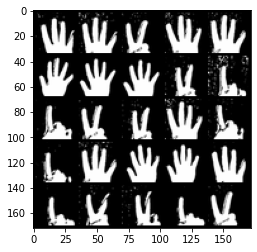

Step 800:
Generator loss: 2.0098291218280795
Discriminator loss: 0.4504635429382324


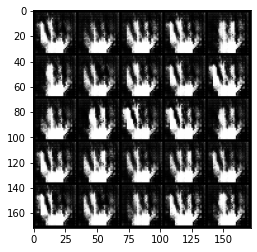

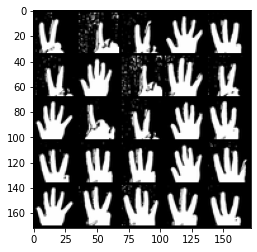

Step 900:
Generator loss: 1.273596621155739
Discriminator loss: 0.5684940174221993


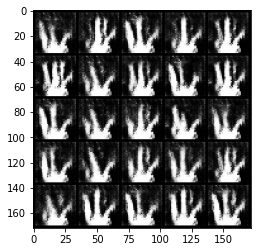

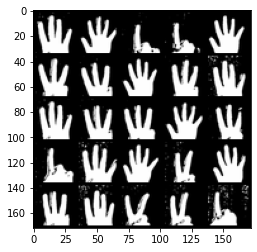

Step 1000:
Generator loss: 0.9726702797412871
Discriminator loss: 0.5944394189119337


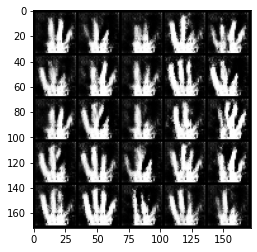

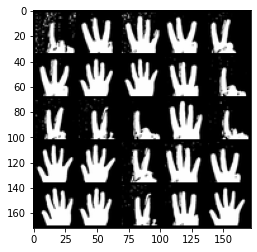

Step 1100:
Generator loss: 0.9248300388455386
Discriminator loss: 0.604163694381714


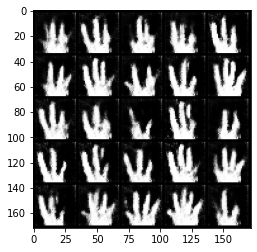

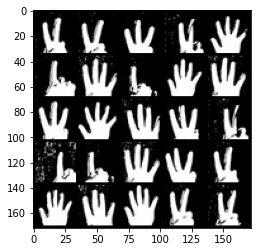

Step 1200:
Generator loss: 0.8916126540303233
Discriminator loss: 0.6276721310615538


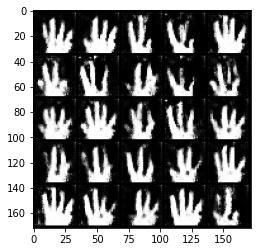

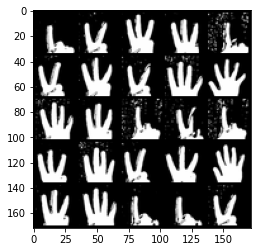

Step 1300:
Generator loss: 0.8742205482721326
Discriminator loss: 0.6434923356771471


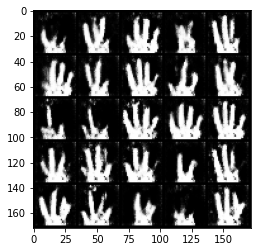

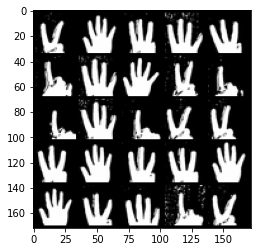

Step 1400:
Generator loss: 0.8676247346401215
Discriminator loss: 0.6413783329725267


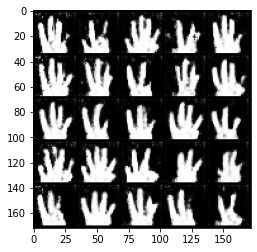

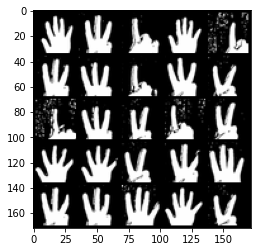

Step 1500:
Generator loss: 0.8518208938837051
Discriminator loss: 0.6544628453254699


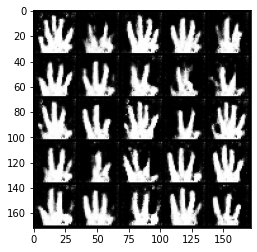

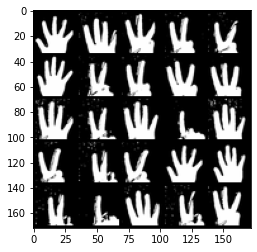

Step 1600:
Generator loss: 0.8461332100629809
Discriminator loss: 0.6510678130388257


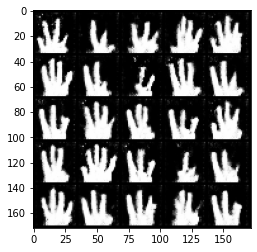

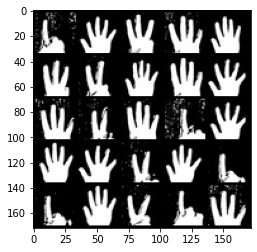

Step 1700:
Generator loss: 0.8260329252481459
Discriminator loss: 0.6535358804464342


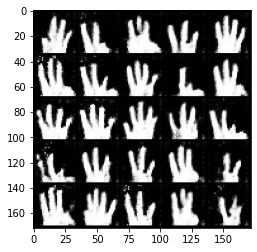

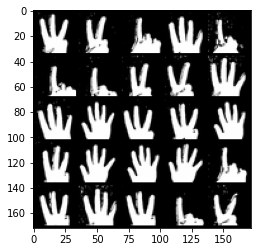

Step 1800:
Generator loss: 0.8253968322277068
Discriminator loss: 0.660394461750984


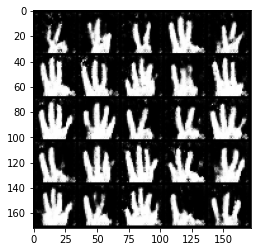

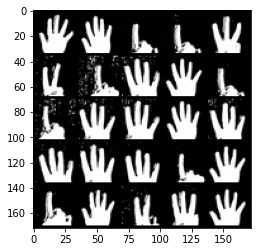

Step 1900:
Generator loss: 0.809305764436722
Discriminator loss: 0.6575178062915801


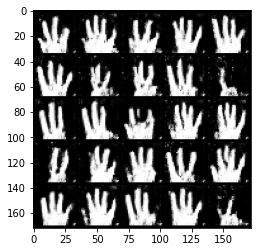

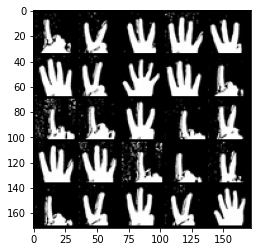

Step 2000:
Generator loss: 0.8047669589519497
Discriminator loss: 0.6594692724943161


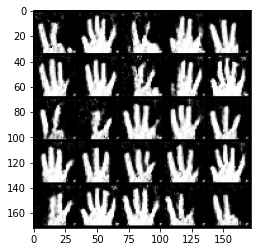

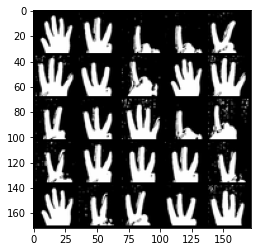

Step 2100:
Generator loss: 0.7970816349983213
Discriminator loss: 0.6600743800401686


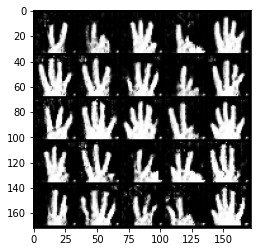

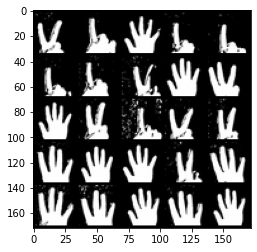

Step 2200:
Generator loss: 0.8001454049348831
Discriminator loss: 0.669758966565132


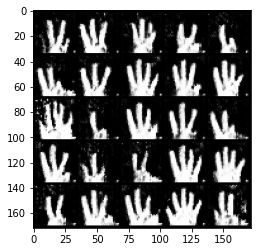

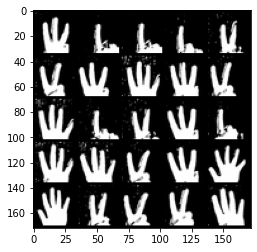

Step 2300:
Generator loss: 0.8009951579570767
Discriminator loss: 0.6750366014242172


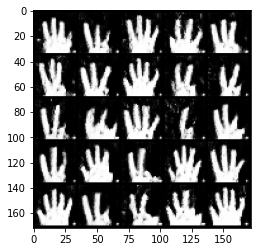

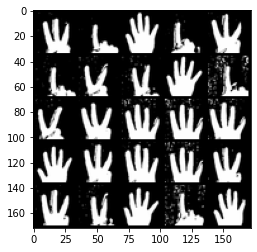

In [11]:
n_epochs = 300
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0

gen_loss_epoch = list()
disc_loss_epoch = list()
Acc_epoch = list()

for epoch in range(n_epochs):
    gen_lss = list()
    disc_lss = list()
    Acc = list()
    
    for real, _ in (dataloader):
        cur_batch_size = len(real)
        real = real.to(device)
        # Updating discriminator
        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim, device=device)
        fake_noise=fake_noise.unsqueeze(2)
        fake_noise=fake_noise.unsqueeze(3)
        fake = gen(fake_noise)

        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))

        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))

        disc_loss = (disc_fake_loss + disc_real_loss) / 2
        mean_discriminator_loss += disc_loss.item() / display_step

        disc_loss.backward(retain_graph=True)
        disc_opt.step()

        # Updating generator
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
        fake_noise_2=fake_noise_2.unsqueeze(2)
        fake_noise_2=fake_noise_2.unsqueeze(3)
        fake_2 = gen(fake_noise_2)

        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))

        gen_loss.backward()
        gen_opt.step()

        mean_generator_loss += gen_loss.item() / display_step

        gen_lss.append(mean_generator_loss) 
        disc_lss.append(mean_discriminator_loss) 

        acc = metric(disc_fake_pred, torch.ones_like(disc_fake_pred)) + metric(disc_real_pred, torch.zeros_like(disc_fake_pred))
        acc = acc / 2
        Acc.append(acc.item())

        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}:")
            print(f"Generator loss: {mean_generator_loss}")
            print(f"Discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1

    Acc_epoch.append(sum(Acc) / len(Acc))
    gen_loss_epoch.append(sum(gen_lss) / len(gen_lss))
    disc_loss_epoch.append(sum(disc_lss) / len(disc_lss))

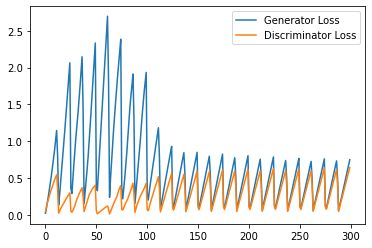

In [12]:
plt.plot(gen_loss_epoch, label='Generator Loss')
plt.plot(disc_loss_epoch, label='Discriminator Loss')
plt.legend()
plt.show()

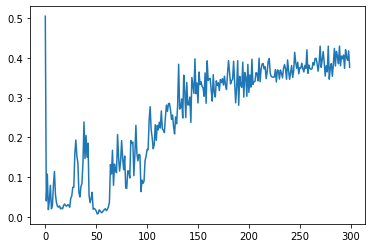

In [13]:
plt.plot(Acc_epoch)

# Now One Sided Smoothing Added



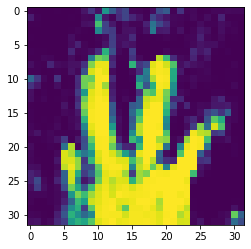

In [14]:
plt.imshow(  fake[1].cpu().permute(1, 2, 0).squeeze(2).detach().numpy()  )

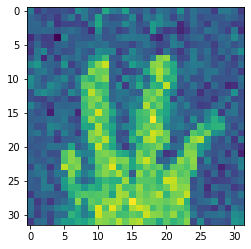

In [15]:
x = fake[1] + (0.1**0.5)*torch.randn(1, 32, 32).to(device)
plt.imshow(  x.cpu().permute(1, 2, 0).squeeze(2).detach().numpy()  )

# Train DCGAN + Label Smoothing + Noise Addition

Step 100:
Generator loss: 0.9007294094562528
Discriminator loss: 0.6785632967948916


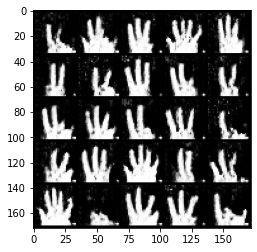

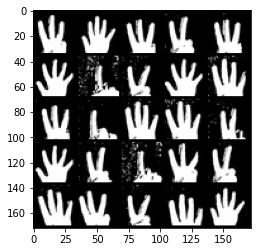

Step 200:
Generator loss: 0.8842093664407734
Discriminator loss: 0.6757625162601474


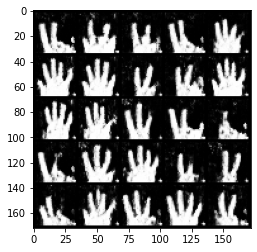

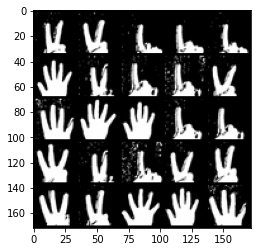

Step 300:
Generator loss: 0.8944420832395554
Discriminator loss: 0.6744484341144564


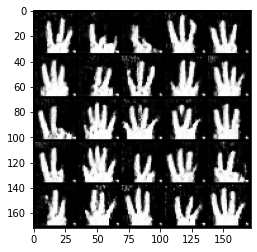

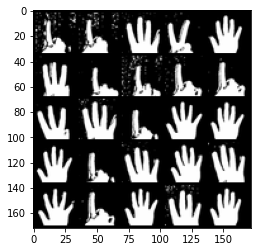

Step 400:
Generator loss: 0.8938471281528472
Discriminator loss: 0.6780554753541946


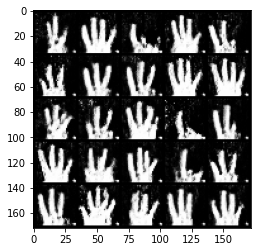

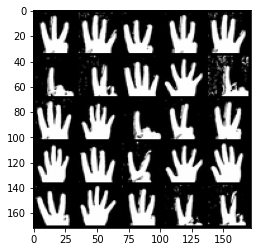

Step 500:
Generator loss: 0.8819835698604581
Discriminator loss: 0.6769685864448547


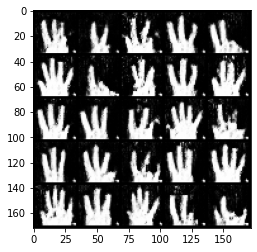

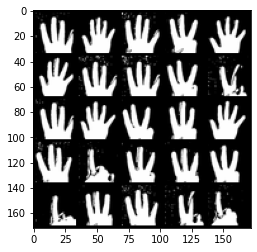

Step 600:
Generator loss: 0.8764652091264725
Discriminator loss: 0.6770132172107695


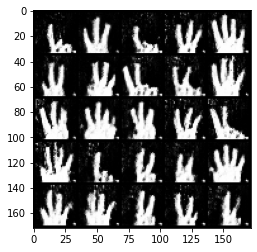

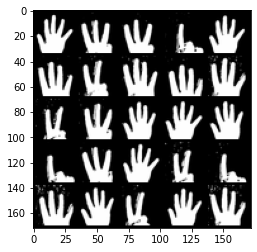

Step 700:
Generator loss: 0.8790677785873413
Discriminator loss: 0.677549825310707


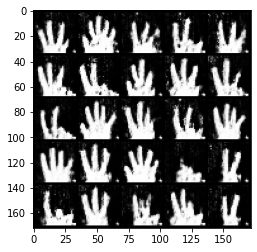

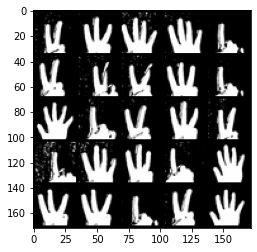

Step 800:
Generator loss: 0.8814161849021914
Discriminator loss: 0.6767650449275969


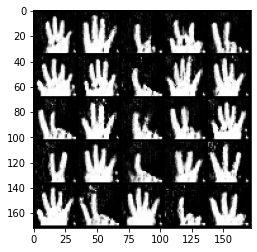

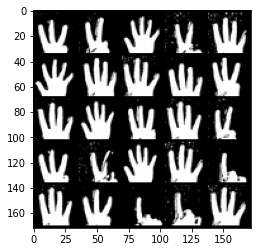

Step 900:
Generator loss: 0.8772924125194551
Discriminator loss: 0.6781672799587253


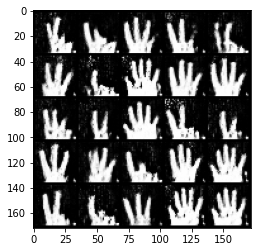

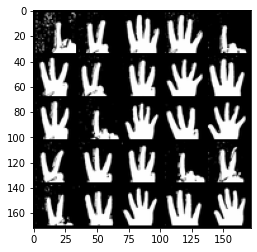

Step 1000:
Generator loss: 0.8815354931354524
Discriminator loss: 0.6784655088186266


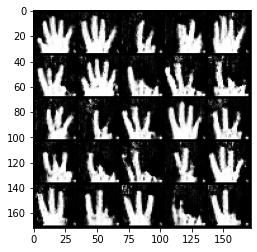

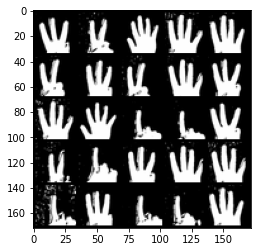

Step 1100:
Generator loss: 0.8773500150442124
Discriminator loss: 0.6758709472417833


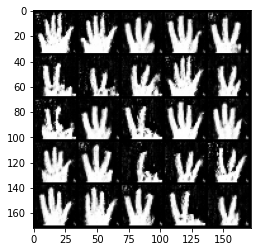

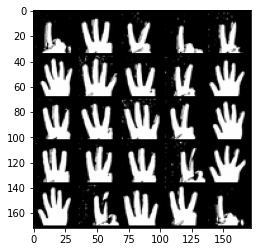

Step 1200:
Generator loss: 0.8820536535978319
Discriminator loss: 0.6722720336914062


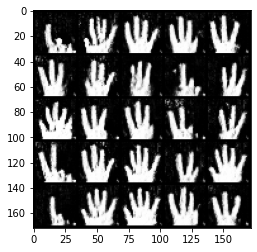

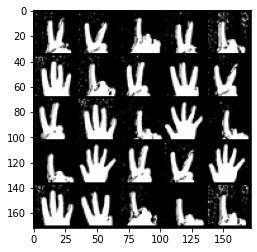

Step 1300:
Generator loss: 0.8842528116703031
Discriminator loss: 0.6734889203310013


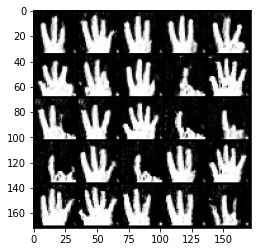

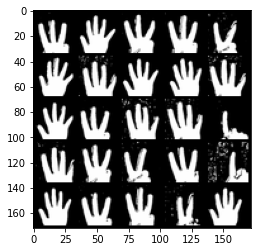

Step 1400:
Generator loss: 0.8955052059888842
Discriminator loss: 0.6745219093561174


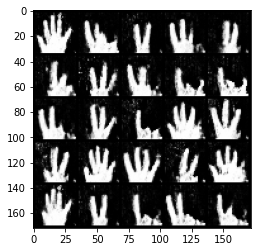

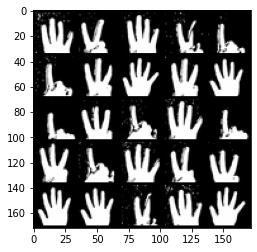

Step 1500:
Generator loss: 0.8880451267957685
Discriminator loss: 0.6731136178970337


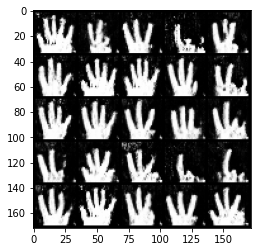

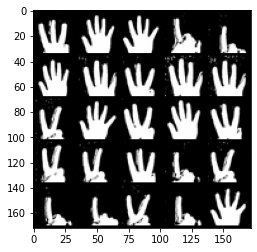

In [16]:
n_epochs = 200
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0

gen_loss_epoch = list()
disc_loss_epoch = list()
Acc_epoch = list()


for epoch in range(n_epochs):
    gen_lss = list()
    disc_lss = list()
    Acc = list()
    for real, _ in (dataloader):
        cur_batch_size = len(real)
        real = real.to(device)
        # Updating discriminator
        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim, device=device)
        fake_noise=fake_noise.unsqueeze(2)
        fake_noise=fake_noise.unsqueeze(3)
        fake = gen(fake_noise)
        # Add noise
        fake = fake + (0.01**1)*torch.randn(len(real), 32, 32).unsqueeze(1).to(device)

        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))

        disc_real_pred = disc(real)
        #label smoothing
        disc_real_loss = criterion(disc_real_pred, 0.9*torch.ones_like(disc_real_pred))

        disc_loss = (disc_fake_loss + disc_real_loss) / 2
        mean_discriminator_loss += disc_loss.item() / display_step

        disc_loss.backward(retain_graph=True)
        disc_opt.step()

        # Updating generator
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
        fake_noise_2=fake_noise_2.unsqueeze(2)
        fake_noise_2=fake_noise_2.unsqueeze(3)
        fake_2 = gen(fake_noise_2)

        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))

        gen_loss.backward()
        gen_opt.step()

        mean_generator_loss += gen_loss.item() / display_step

        gen_lss.append(mean_generator_loss) 
        disc_lss.append(mean_discriminator_loss) 

        acc = metric(disc_fake_pred, torch.ones_like(disc_fake_pred)) + metric(disc_real_pred, torch.zeros_like(disc_fake_pred))
        acc = acc / 2
        Acc.append(acc.item())

        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}:")
            print(f"Generator loss: {mean_generator_loss}")
            print(f"Discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1

    Acc_epoch.append(sum(Acc) / len(Acc))
    gen_loss_epoch.append(sum(gen_lss) / len(gen_lss))
    disc_loss_epoch.append(sum(disc_lss) / len(disc_lss))

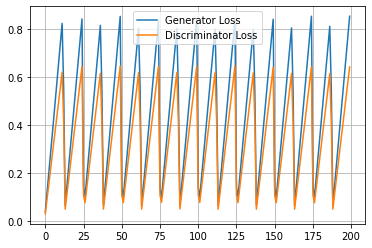

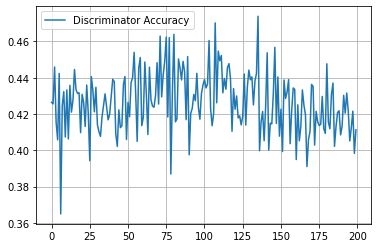

In [17]:
plt.plot(gen_loss_epoch, label='Generator Loss')
plt.plot(disc_loss_epoch, label='Discriminator Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(Acc_epoch, label='Discriminator Accuracy')
plt.legend()
plt.grid()
plt.show()